<a href="https://colab.research.google.com/github/Julimarc07/Biose-ales_Juliana_Mart-nez/blob/main/Pr%C3%A1ctica5_Juliana_Martinez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 5**

# **Representación de señales**

Como ejemplo de señal discreta se utiliza una señal analógica x(t)=Asin(2π Fo t) con frecuencia fundamental de 40Hz, amplitud de 5V y frecuencia de muestreo de 1000Hz (T=0.001s). Definiendo estos parámetros en Python y se toma un ciclo de la señal muestreada:

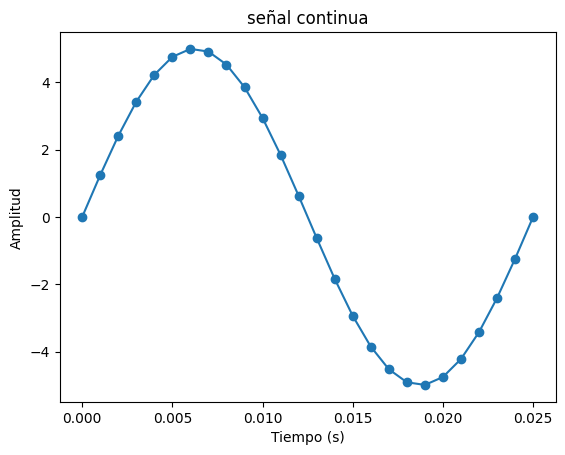

In [39]:
Fo = 40 # Frecuencia fundamental de la señal
Tp = 1/Fo # Periodo de la señal
Fs = 1000 # Frecuencia de muestreo
T = 1/Fs # Periodo de muestreo
t = np.arange(0, Tp+T, T) # Tiempo para un ciclo de la señal con duración de Tp más una muestra T
A = 5 #Amplitud
x = A*np.sin(2*np.pi*Fo*t)
plt.plot(t, x, marker='o')
plt.title('señal continua')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

Se observa claramente que el periodo de la señal en tiempo continues es de 0.025 s.

Una manera alternativa de crear la señal X(n) es la siguiente:

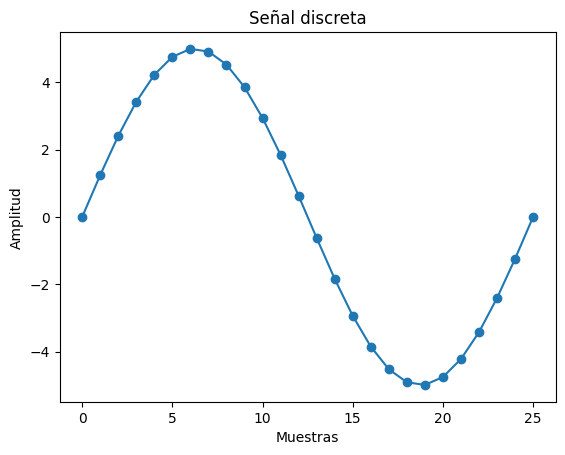

In [40]:
fo = Fo/Fs
n = np.arange(0, len(t))
x1 = A*np.sin(2*np.pi*fo*n)
plt.plot(n, x1, marker='o')
plt.title('Señal discreta')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

**a) Compruebe que los valores de las primeras cinco muestras son los mismos**

In [41]:
muestrasx=x[0:5]
muestrasx1=x1[0:5]

if muestrasx.any() == muestrasx1.any():
    print("Las primeras cinco muestras son iguales")
    print(f'las primeras cinco muestras de x son: {muestrasx[0]},{muestrasx[1]},{muestrasx[2]},{muestrasx[3]},{muestrasx[4]}')
    print(f'las primeras cinco muestras de x1 son: {muestrasx1[0]},{muestrasx1[1]},{muestrasx1[2]},{muestrasx1[3]},{muestrasx1[4]}')

else:
    print("Las primeras cinco muestras no son iguales")

Las primeras cinco muestras son iguales
las primeras cinco muestras de x son: 0.0,1.243449435824274,2.4087683705085765,3.4227355296434436,4.221639627510076
las primeras cinco muestras de x1 son: 0.0,1.243449435824274,2.4087683705085765,3.4227355296434436,4.221639627510076


Se puede observar que las primeras cinco muestras de ambas señales son iguales.

Las señales muestradas se pueden graficar mediante la función stem

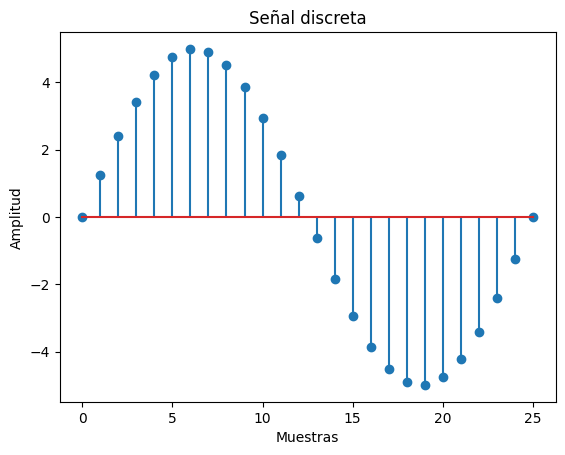

In [42]:
plt.stem(n, x1)
plt.title('Señal discreta')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

**2.Energía y potencia en el dominio del tiempo**

In [43]:
energia = sum(x**2) #Se halla la energía medida en V^2 o W de la señal en tiempo continuo
potencia = energia/(len(t)-1) #se halla la potencia media de la señal medida en W
rms = np.sqrt(potencia) #Se halla el valor cuadrático medio de la raíz cuadrada de la potencia

print(f'La energía de la señal es: {(energia)}')
print(f'La potencia media de la señal es: {(potencia)}')
print(f'El valor cuadrático medio de la raíz cuadrada de la potencia es: {(rms)} ')

La energía de la señal es: 312.50000000000006
La potencia media de la señal es: 12.500000000000002
El valor cuadrático medio de la raíz cuadrada de la potencia es: 3.5355339059327378 



Para hallar la energía y la potencia media de la señal considerando 10 ciclos de la sinusoide (t = 250 ms).

In [45]:
t10_ciclos = np.arange(0,10*Tp+T,T)
x10_ciclos = A*np.sin(2*np.pi*Fo*t10_ciclos)
energia10_ciclos = sum(x10_ciclos**2)
potencia10_ciclos = energia10_ciclos/(len(t10_ciclos)-1)
rms10_ciclos = np.sqrt(potencia10_ciclos)

print(f'La energía de la señal en 10 ciclos es: {(energia10_ciclos)}')
print(f'La potencia media de la señal en 10 ciclos es: {(potencia10_ciclos)}')
print(f'El valor cuadrático medio de la raíz cuadrada de la potencia en 10 ciclos es: {(rms10_ciclos)} ')

La energía de la señal en 10 ciclos es: 3125.0000000000014
La potencia media de la señal en 10 ciclos es: 12.500000000000005
El valor cuadrático medio de la raíz cuadrada de la potencia en 10 ciclos es: 3.535533905932738 


**b) La potencia es la misma que en x(n). ¿Por qué?**

In [46]:
if round(potencia) == round(potencia10_ciclos):
    print("La potencia es la misma")
else:
    print("La potencia es diferente")

La potencia es la misma


Se observa que la potencia es la misma para las señales. Esto se debe a que la señal a trabajar es una señal periódica, y como la potencia media se mide como la cantidad de energía por unidad de tiempo, en un señal periódica esta medida será constante en cada ciclo (pero la energía si aumenta a medida que se aumente los ciclos, como se evidencio anteriormente), lo que hace que la potencia media sea independiente de la cantidad de ciclos que se tome de la señal [1].

# **Aplicación**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
from scipy.signal import welch as pwelch
from scipy.signal import find_peaks, get_window

**1. Cree una señal que sea la suma de tres componentes sinusoidales con frecuencias de 40, 80 y 160 Hz. Defina la frecuencia de muestreo mínima necesaria para representar la señal, y utilice la frecuencia de muestreo necesaria para representarla apropiadamente.**

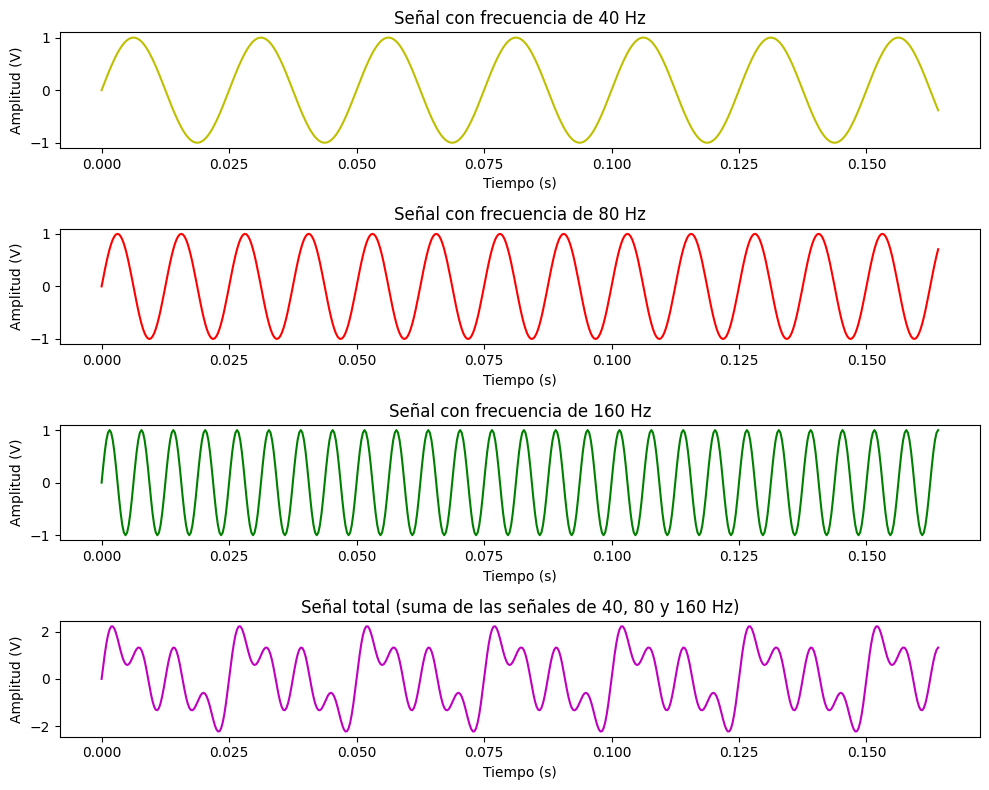

In [2]:
Fo = 160 #Frec fundamental
To = 1/Fo #Periodo de la señal
Fs = 160*20 #Frec muestreo
T = 1/Fs

t=np.arange(0,25*(T+To),T)

x_40=np.sin(2*np.pi*40*t)
x_80=np.sin(2*np.pi*80*t)
x_160=np.sin(2*np.pi*160*t)
#x_total=np.sin(2*np.pi*40*t)+np.sin(2*np.pi*80*t)+np.sin(2*np.pi*160*t)
x_total=x_40+x_80+x_160

plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(t, x_40, color='y')
plt.title('Señal con frecuencia de 40 Hz')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')


plt.subplot(4, 1, 2)
plt.plot(t, x_80, color='r')
plt.title('Señal con frecuencia de 80 Hz')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')


plt.subplot(4, 1, 3)
plt.plot(t, x_160, color='g')
plt.title('Señal con frecuencia de 160 Hz')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')


plt.subplot(4, 1, 4)
plt.plot(t, x_total,color='m')
plt.title('Señal total (suma de las señales de 40, 80 y 160 Hz)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')


plt.tight_layout()
plt.show()

Se usa una frecuencia de muestreo mayor al doble de la frecuencia máxima de la señal (160Hz), de tal manera que se cumpla con el teorema de Nyquist [2]

**2. Calcule la transformada de Fourier de la señal y grafique el espectro de frecuencia. Identifique en el espectro las frecuencias que componen la señal (trabaje con 10 periodos de la señal).**

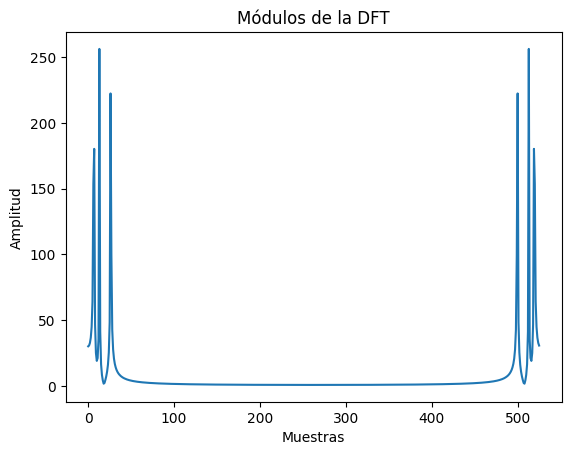

In [3]:
X10 = np.fft.fft(x_total)
plt.plot(abs(X10))
plt.title('Módulos de la DFT')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

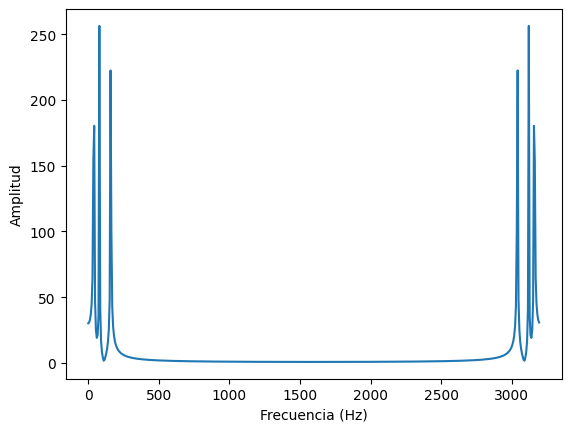

In [4]:
N = len(X10)
F = np.arange(0,N)*Fs/N
plt.plot(F,abs(X10))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.show()

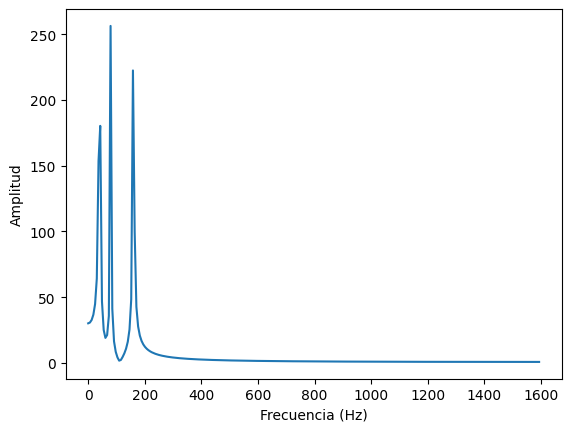

In [5]:
Nmitad = int(np.ceil(N/2))
Fmitad = np.arange(0,Nmitad)*Fs/N
X10mitad = X10[0:Nmitad]
plt.plot(Fmitad,abs(X10mitad))
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia (Hz)')
plt.show()

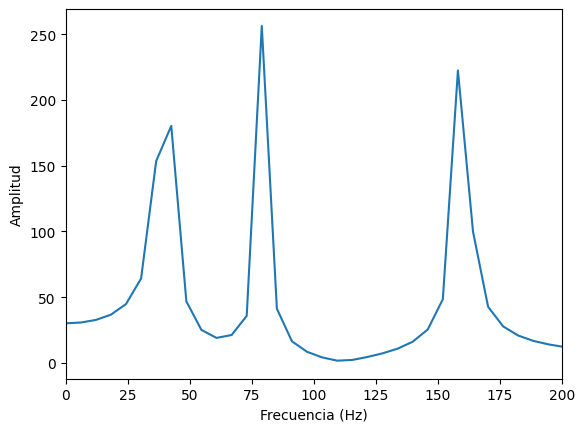

In [6]:
plt.plot(Fmitad,abs(X10mitad))
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia (Hz)')
plt.xlim(0,200)
plt.show()

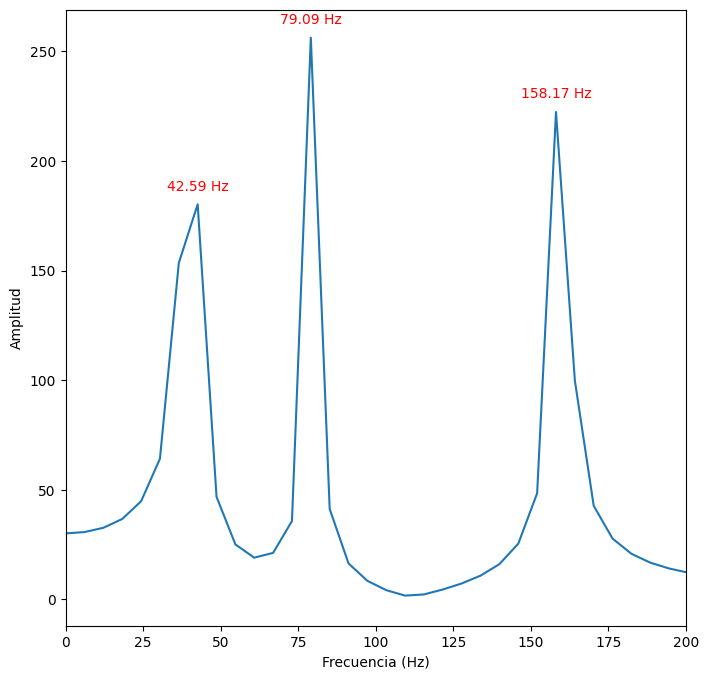

In [7]:
peaks, _ = find_peaks(abs(X10mitad), height=10)
plt.figure(figsize=(8, 8))
plt.plot(Fmitad,abs(X10mitad))
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia (Hz)')
plt.xlim(0,200)

for peak in peaks:
    plt.annotate(f'{Fmitad[peak]:.2f} Hz', (Fmitad[peak], abs(X10mitad[peak])),
                 textcoords="offset points", xytext=(0,10), ha='center', color='r')

plt.show()

**3. Consulte la función que permite realizar el cálculo de la transformada inversa de Fourier. Aplíquelo a la señal anterior**

**Transformada inversa de Fourier**

Se halla con el comando ‘np.fft.ifft()’ el cual calcula las Transformada Inversa de Fourier discreta de una secuencia unidimensional [3]

/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


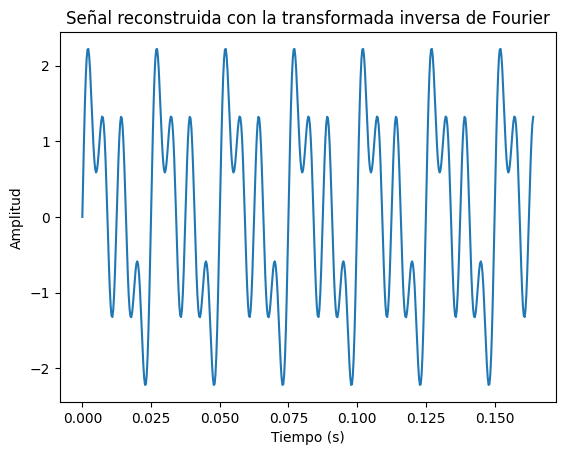

In [8]:
x_inv = np.fft.ifft(X10)

plt.plot(t, x_inv)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal reconstruida con la transformada inversa de Fourier')
plt.show()

**4. ¿Podría decir que las siguientes líneas aplican un filtro? ¿Por qué?**

**F1 = np.fft.fft(x);**

**F2 = np.zeros((len(F1)));**

**F2[9:13] = F1[9:13];**

**xr = np.fft.ifft(F2);**

**fig = plt.figure()**

**ax = fig.add_subplot(111)**

**ax.plot(t, np.real(xr))**

**ax.set(xlabel='Tiempo (s)', ylabel='Amplitud (V)');**

**plt.show()**

**Extraiga de manera similar cada una de las componentes de la señal.**

Sí, las líneas anteriores permiten la aplicación de un filtro, tal que:

**F1 = np.fft.fft(x);** Se le apluca la transformada Rápida de Fourier (FFT) de la señal


**F2 = np.zeros((len(F1)));** Se crea un nuevo arreglo F2 lleno de ceros para almacenar la señal filtrada en el dominio de la frecuencia.

**F2[9:13] = F1[9:13];** Copia un rango específico de frecuencias de F1 a F2. En este caso, solo se copian las frecuencias representadas por los índices del 9 al 12. El resto de las frecuencias en F2 permanecen en cero. Esto elimina o atenúa las frecuencias fuera de este rango. Lo que permite que trabaje como un filtro para la señal.

**xr = np.fft.ifft(F2);** Se calcula la Transformada Inversa Rápida de Fourier (IFFT) de F2, xr contiene la señal filtrada en el tiempo.

Por último, se grafica la señal filtrada.

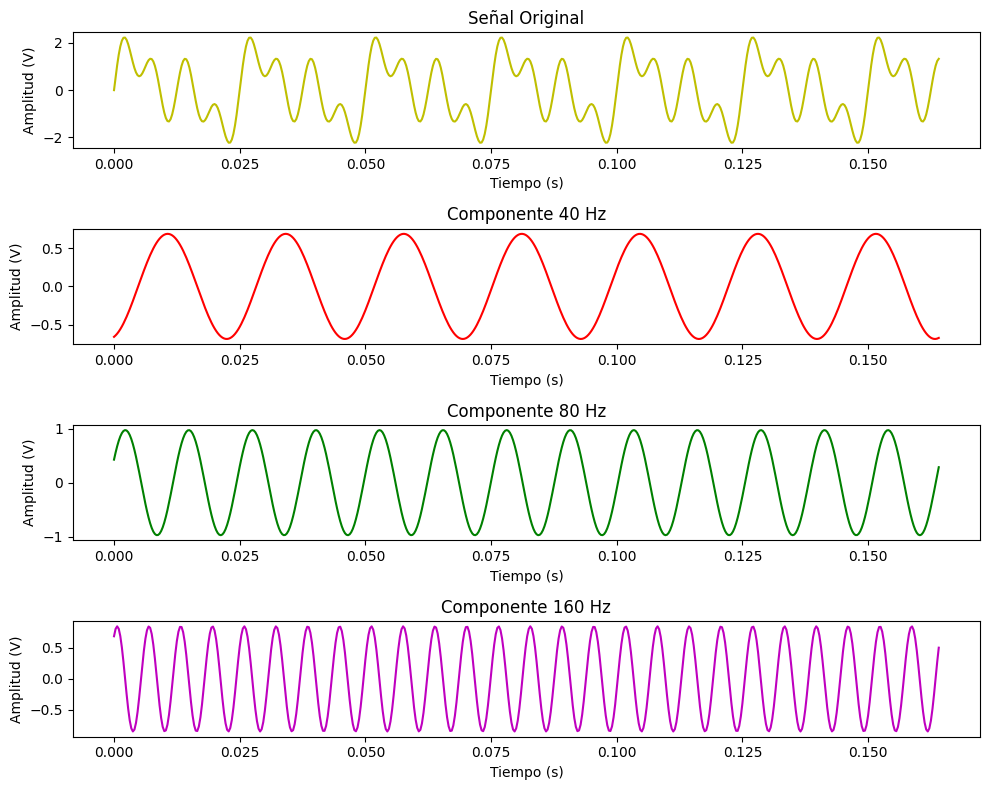

In [9]:
F1 = np.fft.fft(x_total)

def filtrar_componente(fft_data, frecuencia_objetivo, fs):
    freqs = np.fft.fftfreq(len(fft_data), 1/fs) #‘np.fft.fftfreq()’: Genera las frecuencias correspondientes a las salidas de ‘fft‘.
    indice = np.argmin(np.abs(freqs - frecuencia_objetivo))
    F2 = np.zeros(len(fft_data), dtype=complex)
    F2[indice] = fft_data[indice]
    F2[-indice] = fft_data[-indice]
    return np.fft.ifft(F2)

xr_40 = filtrar_componente(F1, 40, Fs)
xr_80 = filtrar_componente(F1, 80, Fs)
xr_160 = filtrar_componente(F1, 160, Fs)


plt.figure(figsize=(10, 8))


plt.subplot(4, 1, 1)
plt.plot(t, x_total, color='y')
plt.title('Señal Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')


plt.subplot(4, 1, 2)
plt.plot(t, np.real(xr_40), color='r')
plt.title('Componente 40 Hz')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')


plt.subplot(4, 1, 3)
plt.plot(t, np.real(xr_80), color='g')
plt.title('Componente 80 Hz')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')


plt.subplot(4, 1, 4)
plt.plot(t, np.real(xr_160),color='m')
plt.title('Componente 160 Hz')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')

plt.tight_layout()
plt.show()

**5. El archivo adjunto (senecg.mat) contiene una señal de ECG adquirida a una frecuencia de muestreo de 250 Hz. Realice un análisis en frecuencia de la señal usando periodogramas de Welch y determine si es necesario eliminar ruido, en tal caso, elimínelo de la forma que se mostró antes y compruebe que lo haya realizado, calcule la transformada inversa de Fourier de la señal filtrada y compruebe con el periodograma. (Usar una ventana Hanning, y justificar la elección del solapamiento y el ancho de la ventaja)**

In [10]:

from scipy.io import loadmat
from google.colab import files
uploaded = files.upload()

data = loadmat('senecg.mat')
Señal_ECG = data['ECG']
print(Señal_ECG)


Saving senecg.mat to senecg.mat
[[ 0.16479384]
 [-0.00455636]
 [-0.23589197]
 ...
 [ 0.00518452]
 [-0.18447972]
 [ 0.015     ]]


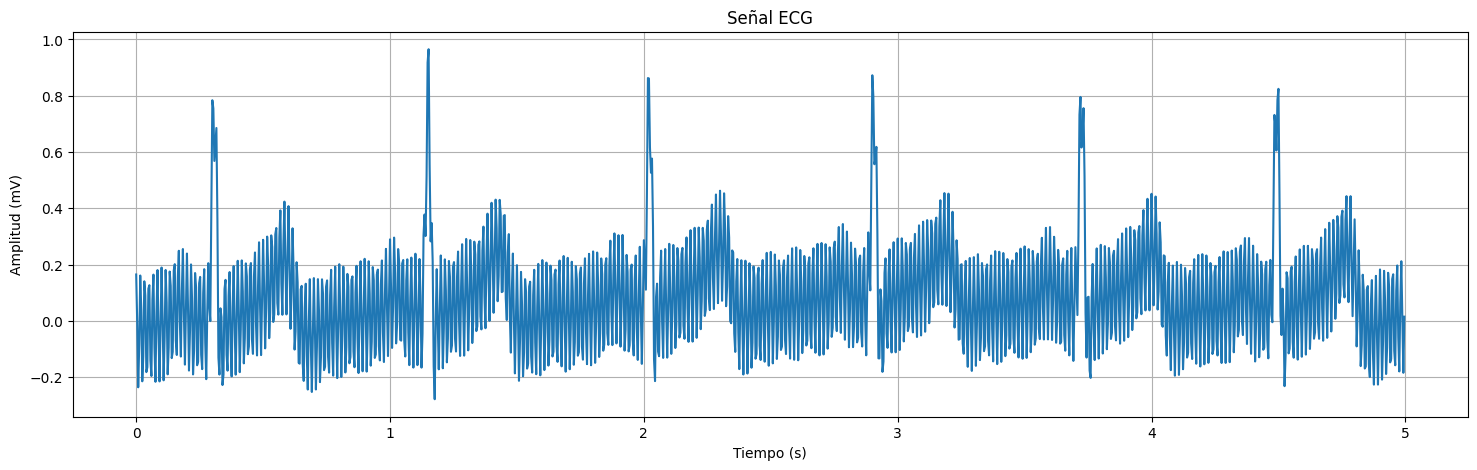

In [18]:
fs = 250
plt.figure(figsize=(18, 5))
plt.plot(np.arange(0, len(Señal_ECG) / fs, 1 / fs), Señal_ECG)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.title('Señal ECG')
plt.grid(True)
plt.show()

**Periodograma por el método de Welch**

Una ventana de 512 muestras con una frecuencia de muestreo de 250 Hz cubre unos 2 segundos de señal. Esto suele ser suficiente para capturar varios ciclos cardíacos completos y permite una resolución en frecuencia de 0.488 Hz, lo cual es adecuado para distinguir componentes en el espectro de frecuencias típicas del ECG (1-60 Hz) [4]

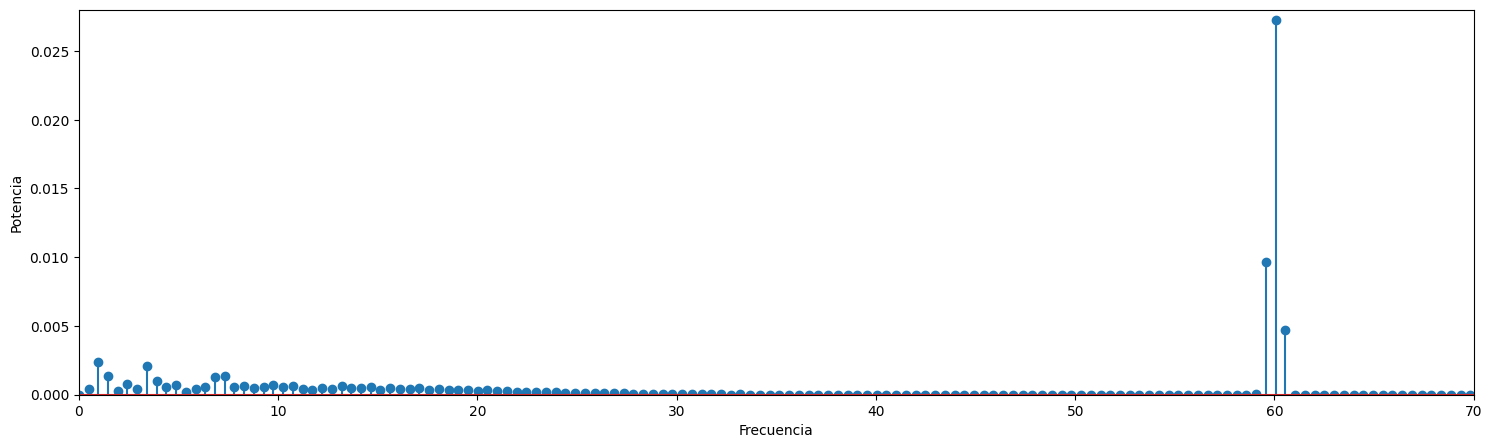

In [12]:
Señal_ECG_flatten= Señal_ECG.flatten() #Se realiza flatten a la señal por que la función de welch en python funciona con señales unidimensionales
nperseg = 512 # ancho de la ventana
noverlap = int(nperseg / 2)
f, Pxx = pwelch(Señal_ECG_flatten, fs, nperseg=nperseg, noverlap=noverlap, window='hann')
plt.figure(figsize=(18, 5))
plt.stem(f, Pxx)
plt.xlabel('Frecuencia')
plt.ylabel('Potencia')
plt.xlim([0, 70])
plt.ylim([0, 0.028])
plt.show()

En el periodograma se puede observar que los picos que contienen la información importante son aquellos que se encuentran por debajo de los 10 Hz, ya que por debajo de esta frecuencias se encuetran los componentes relevantes de una señal ECG, las ondas P,T y el complejo QRS. El complejo QRS, que corresponde a la despolarización de los ventrículos, generalmente contiene frecuencias entre 8 y 50 Hz, siendo la más predominante. La onda T se sitúa principalmente en un rango de 0 a 10 Hz, asociada a la repolarización de los ventrículos. Por otro lado, la onda P se caracteriza por frecuencias de 5 a 30 Hz, relacionadas con la despolarización de las aurículas [5].

Además, se puede observar la presencia de picos cerca de una frecuencia de 60 Hz, esto hace referencia al ruido caracteristico producido por la interferencia de la red electrica, el cual es común que aparezca al adquirir la señal y la distorsiona significativamente, afectando la precisión de los análisis. Por esto, se realizó un filtrado pasa bajas con una frecuencia de corte de 57Hz con el fin de optimizar el análisis de la señal cardíaca centralizandolo en las frecuencias que proporcionan información significativa, facilitando la identificación de patrones y anomalías que son cruciales para la evaluación clínica [6].

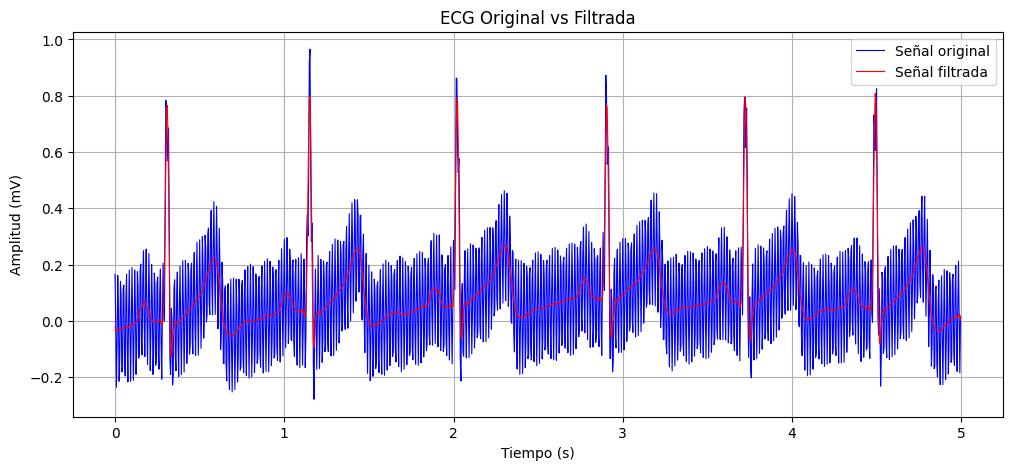

In [22]:
Señal_ECG_flatten = np.ravel(Señal_ECG)
time = np.arange(0, len(Señal_ECG_flatten)) / fs
frec_deseada = 57
frecuencias = np.fft.fftfreq(len(Señal_ECG_flatten), 1/fs)
F1 = np.fft.fft(Señal_ECG_flatten)
F2 = np.where(np.abs(frecuencias) > frec_deseada, 0, F1)
xr = np.fft.ifft(F2)

#Graficar señal original y filtrada
plt.figure(figsize=(12,5))
plt.plot(time, Señal_ECG_flatten, label="Señal original", color='b',linewidth=0.8)
plt.plot(time, np.real(xr), label="Señal filtrada", color='r',linewidth=0.8)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.title('ECG Original vs Filtrada')
plt.legend()
plt.grid(True)
plt.show()


En la imagen anterior se puede observar la señal al pasarla por el filtro, con el filtro se busco eliminar las frecuencias que estuvieran por encima de 40 Hz, ya que por encima de esta frecuencia no se tiene información relevante para el estudio de la señal. Además, permitio filtrar el ruido que estuviera en frecuencias mayores de 40 Hz como el ruido de la interferencia de la red electrica que se podia observar a una frecuencia de 60 Hz (y el ruido a sus alrededores).

También se puede notar que gracias al filtrado las ondas P y T y el complejo QRS se observan de manera más claras y se mantienen, lo que indica que el filtrado fue efectivo para eliminar el ruido sin afectar o filtrar las partes importantes de la señal.

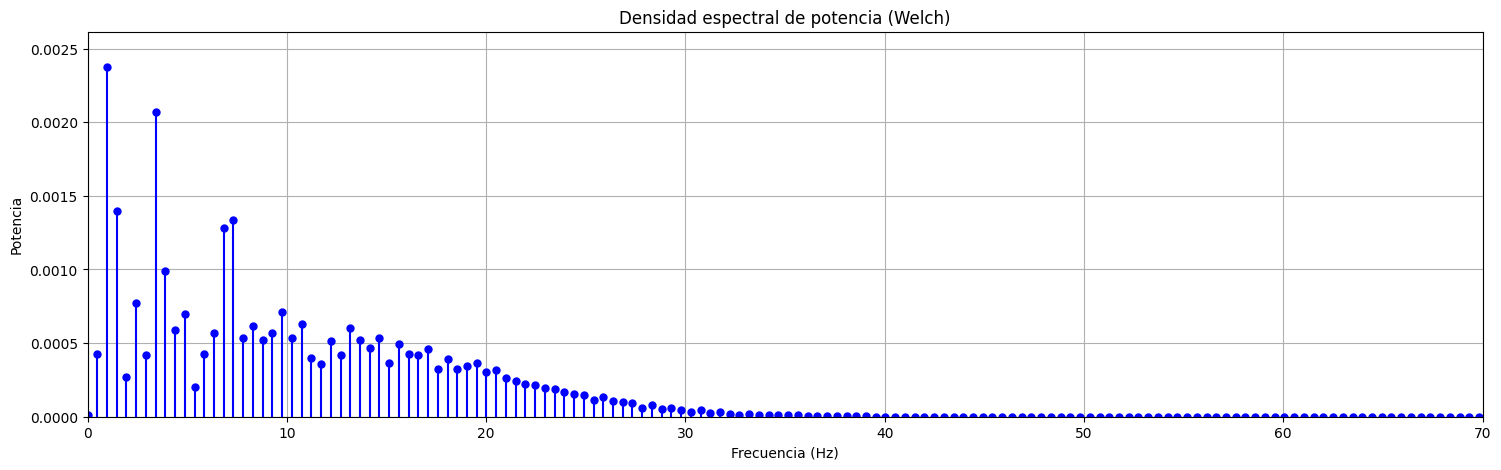

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

fs = 250   # frecuencia de muestreo
nperseg = 512
noverlap = nperseg // 2

# Calcular densidad espectral con Welch
f, Pxx = welch(np.real(xr), fs=fs, window='hann', nperseg=nperseg, noverlap=noverlap)
plt.figure(figsize=(18,5))
markerline, stemlines, baseline = plt.stem(f, Pxx, basefmt=" ")
plt.setp(markerline, color='b', markersize=5)
plt.setp(stemlines, color='b', linewidth=1.5)

plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.title('Densidad espectral de potencia (Welch)')
plt.xlim([0,70])
plt.ylim(0, Pxx.max()*1.1)
plt.grid(True)
plt.show()



En el periodograma de la señal filtrada se puede comprobar que el filtro fue eficaz y que el ruido a los 60 Hz se eliminó y ahora el espectro se concentra en las frecuencias más bajas (hasta 40Hz aproximadamente), donde las componentes fisiologicas importantes del ECG se encuentra.  

Esta minimización del impacto de las interferencias puede conllevar una disminución de la energía en ciertas frecuencias. Sin embargo, este proceso se justifica por la necesidad de selección de las frecuencias que son críticas para el análisis de la señal cardíaca [7]

**6. Realice un análisis de frecuencia a través del periodograma de welch de una señal de EEG de un paciente Sano y otra de un paciente con Parkinson de algún canal que en el proyecto 1 hayan identificado que presentaba diferencias, si no encontró diferencias, elija un par al azar. Realice un análisis comparativo de las señales según lo que le indiquen los periodogramas. (Usar una ventana Hanning, y justificar la elección del solapamiento y el ancho de la ventaja)**

In [38]:
from google.colab import files
uploaded = files.upload()

Saving datos_senales_datos_parkinson_cursos.zip to datos_senales_datos_parkinson_cursos.zip


In [59]:
import zipfile
with zipfile.ZipFile("datos_senales_datos_parkinson_cursos.zip", 'r') as zip_ref:
    zip_ref.extractall("datos")


In [60]:
carpeta_origen = "/content/datos"
print(carpeta_origen)

/content/datos


**Paciente control**

In [81]:
import os
import scipy.io as sio

archivos_control_sujetos = os.listdir(carpeta_origen + "/control")
control = sio.loadmat(carpeta_origen + "/control/" + archivos_control_sujetos[7])
data_control = control['data']
sujeto_control = data_control[:, :, :]
print(sujeto_control.shape)
print(sujeto_control)

(8, 2000, 161)
[[[-1.48865986e+00 -1.68543398e+00 -2.28664231e+00 ... -1.90090680e+00
    1.18492097e-01  8.48384738e-01]
  [-1.40338409e+00 -1.65917647e+00 -2.26360679e+00 ... -1.86247301e+00
    5.09044118e-02  9.63137329e-01]
  [-1.30683172e+00 -1.62469566e+00 -2.25027871e+00 ... -1.82256937e+00
   -1.79820955e-02  1.06676447e+00]
  ...
  [-9.62349415e-01 -4.33619738e+00 -5.20867205e+00 ...  1.03423131e+00
    1.57385540e+00  3.91294211e-01]
  [-9.44101632e-01 -4.28115749e+00 -5.29315090e+00 ...  1.20924425e+00
    1.71513212e+00  3.14421684e-01]
  [-9.23185945e-01 -4.23028564e+00 -5.36546516e+00 ...  1.35663927e+00
    1.83930135e+00  2.65277475e-01]]

 [[-1.52928317e+00 -3.22996593e+00 -2.43603349e+00 ... -3.02833962e+00
    1.51170957e+00 -5.80477297e-01]
  [-1.60125470e+00 -3.19609809e+00 -2.47197628e+00 ... -2.99864173e+00
    1.48163068e+00 -4.56707805e-01]
  [-1.66560686e+00 -3.15680885e+00 -2.52702546e+00 ... -2.97150660e+00
    1.45524549e+00 -3.35352182e-01]
  ...
  [-2.27

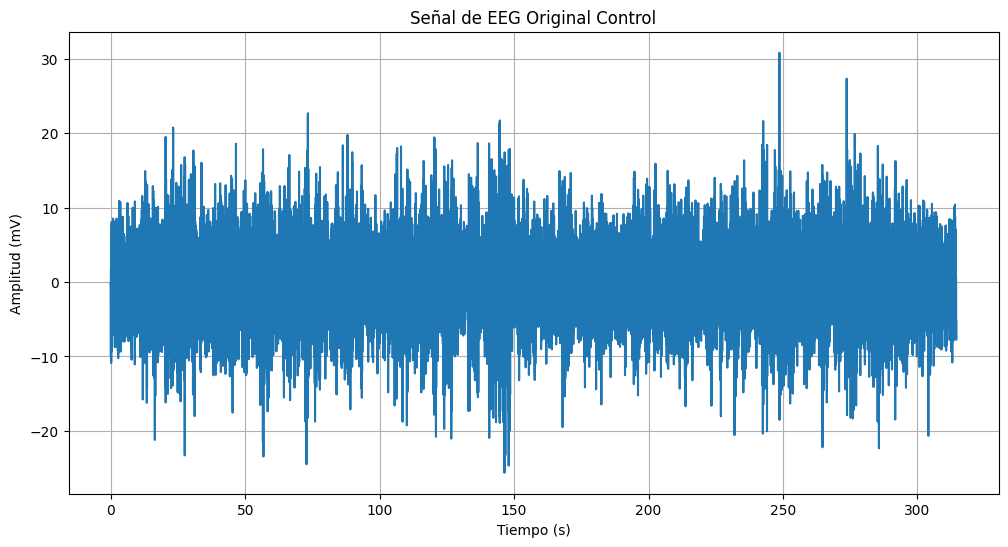

In [82]:
señal_EEG_control = np.reshape(sujeto_control,(sujeto_control.shape[0], sujeto_control.shape[1]*sujeto_control.shape[2]), order='F')[7]

fs = 1024
t = np.arange(0, len(señal_EEG_control) / fs, 1 / fs)
plt.figure(figsize=(12, 6))
plt.plot(t, señal_EEG_control)
plt.title('Señal de EEG Original Control')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.grid(True)
plt.show()

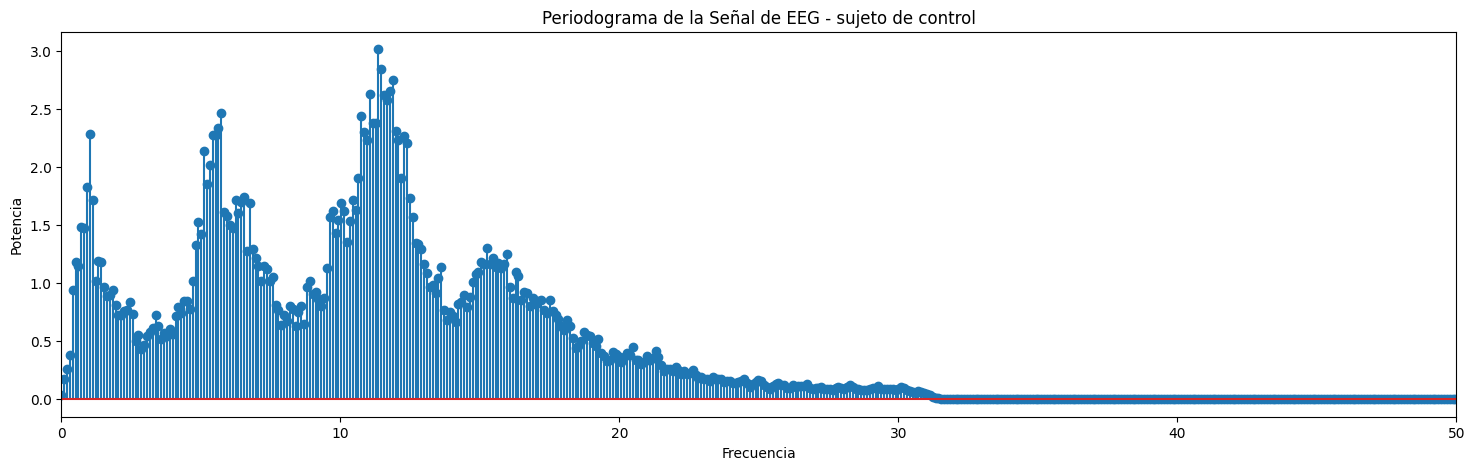

In [83]:
fs =  1024
nperseg = 10000
noverlap = int(nperseg / 2)
f_control, Pxx_control = pwelch(señal_EEG_control, fs, nperseg=nperseg, noverlap=noverlap, window='hann')
plt.figure(figsize=(18, 5))
plt.stem(f_control, Pxx_control)
plt.title('Periodograma de la Señal de EEG - sujeto de control')
plt.xlabel('Frecuencia')
plt.ylabel('Potencia')
plt.xlim([0, 50])
plt.show()

En el periodograma se puede observar una concentración de la potencia en el rango entre los 5 y los 15 Hz, esto corresponde a las ondas alfa
 y theta que esta presente en las señale EEG. Estas ondas están asociadas con estados de relajación y somnolencia, esto indica que el sujeto no presenta una actividad cerebral inusual en estas bandas de frecuencia.

 También se puede observar como la potencia va disminuyendo de manera consistente llegando a 0 después de los 30 Hz lo que es tipico de señales EEG sin patologías, donde no se presentan picos significativos a frecuncias mayores a los 20 Hz.

 Esto indica que el periodograma si es resultado de la señal de un sujeto sano.

**Paciente parkinson**

In [93]:
archivos_parkinson_sujetos = os.listdir(carpeta_origen + "/parkinson")
parkinson = sio.loadmat(carpeta_origen + "/parkinson/" + archivos_parkinson_sujetos[2])
data_parkinson = parkinson['data']
sujeto_parkinson = data_parkinson[:, :, :]
print(sujeto_parkinson.shape)
print(sujeto_parkinson)

(8, 2000, 157)
[[[ 4.94925261e-01  2.29897833e+00 -4.57025957e+00 ... -2.68463701e-01
    9.00576264e-02 -1.60064912e+00]
  [ 2.62935728e-01  2.36321330e+00 -4.57888746e+00 ... -2.27378532e-01
    1.35028064e-01 -1.39103389e+00]
  [ 6.68252539e-03  2.43334270e+00 -4.59564781e+00 ... -1.92813233e-01
    1.96212083e-01 -1.17096007e+00]
  ...
  [ 1.87164116e+00 -2.32888842e+00  2.13960156e-01 ...  9.66583967e-01
   -1.91825378e+00  2.84838367e+00]
  [ 1.87445199e+00 -2.38232064e+00  4.96052146e-01 ...  9.12431061e-01
   -2.09464335e+00  2.84148264e+00]
  [ 1.89326096e+00 -2.42584038e+00  7.55951881e-01 ...  8.58982980e-01
   -2.28118515e+00  2.83048391e+00]]

 [[ 9.44406390e-01  5.32372427e+00 -3.19843626e+00 ... -1.58770990e+00
    8.94060254e-01 -2.36995411e+00]
  [ 7.20486581e-01  5.34738111e+00 -3.12209177e+00 ... -1.60159528e+00
    8.51551414e-01 -2.06391716e+00]
  [ 4.60519463e-01  5.37012339e+00 -3.05331850e+00 ... -1.62491202e+00
    8.15850139e-01 -1.75541615e+00]
  ...
  [ 4.43

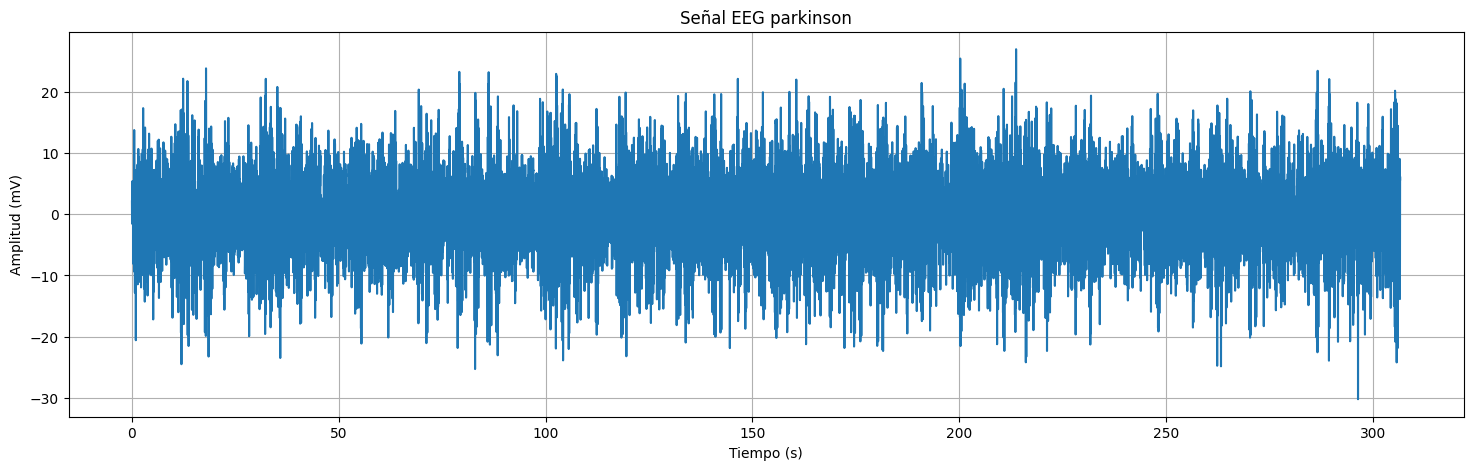

In [94]:
señal_EEG_parkinson = np.reshape(sujeto_parkinson,(sujeto_parkinson.shape[0], sujeto_parkinson.shape[1]*sujeto_parkinson.shape[2]), order='F')[7]
fs=1024
tiempo = np.arange(0, len(señal_EEG_parkinson) / fs, 1 / fs)
plt.figure(figsize=(18, 5))
plt.plot(tiempo, señal_EEG_parkinson)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.title('Señal EEG parkinson')
plt.grid(True)
plt.show()

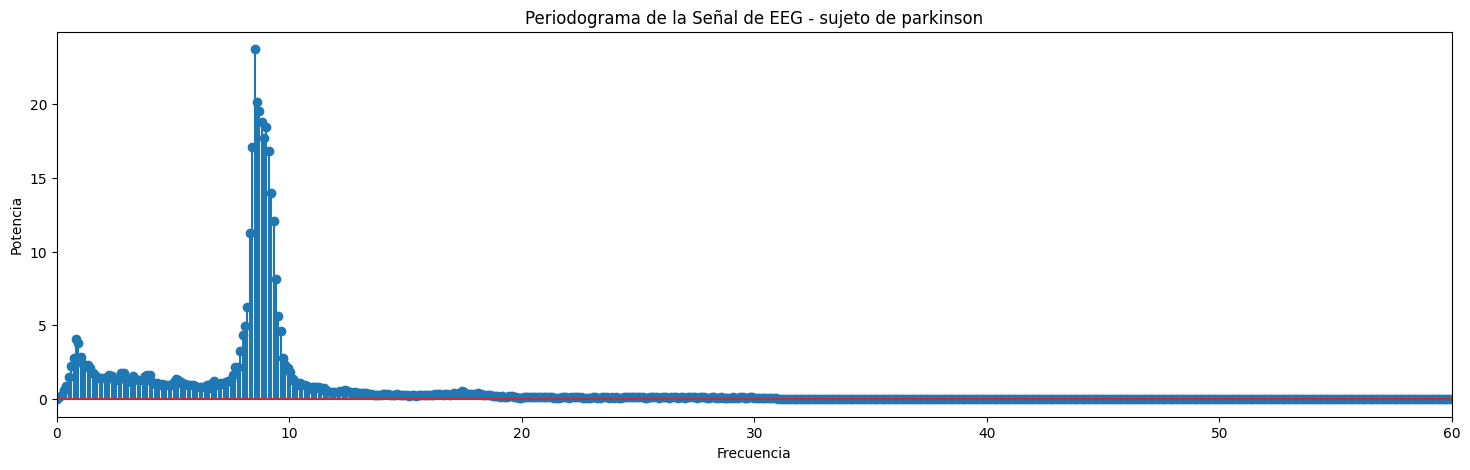

In [95]:
fs =  1024
nperseg = 10000
noverlap = int(nperseg / 2)
f_Parkinson, Pxx_Parkinson = pwelch(señal_EEG_parkinson, fs, nperseg=nperseg, noverlap=noverlap, window='hann')
plt.figure(figsize=(18, 5))
plt.stem(f_Parkinson, Pxx_Parkinson)
plt.title('Periodograma de la Señal de EEG - sujeto de parkinson')
plt.xlabel('Frecuencia')
plt.ylabel('Potencia')
plt.xlim([0, 60])
plt.show()

En el periodograma se observa una concentración notable de la potencia en el rango de frecuencias comprendido aproximadamente entre 7 y 10 Hz, con un pico máximo alrededor de los 8 Hz. Esta zona corresponde principalmente a la banda alfa baja del EEG, aunque también puede solaparse con la banda theta alta. Este aumento de potencia en dichas frecuencias es característico en sujetos con enfermedad de Parkinson, y suele estar asociado con alteraciones en la sincronización neuronal y en los mecanismos de inhibición cortical.

El patrón de potencia sugiere una desincronización cortical parcial, donde las oscilaciones cerebrales presentan una mayor amplitud en las frecuencias bajas, lo cual refleja una comunicación neuronal menos eficiente. Este comportamiento coincide con lo descrito en la literatura sobre EEG de pacientes con Parkinson, en los que se observa un incremento anómalo en las bandas theta y alfa baja debido a la alteración de los circuitos cortico-baso-ganglionares [8].

A partir de los 15 Hz aproximadamente, la potencia disminuye de manera considerable y se mantiene estable en valores bajos hasta los 60 Hz. Esta atenuación progresiva de la potencia en las frecuencias medias y altas es esperable en sujetos con trastornos neurodegenerativos, donde la actividad beta y gamma tiende a reducirse debido al deterioro de la conectividad neuronal y a la pérdida de sincronización entre regiones corticales [8, 9].

**Comparación paciente control y parkinson**

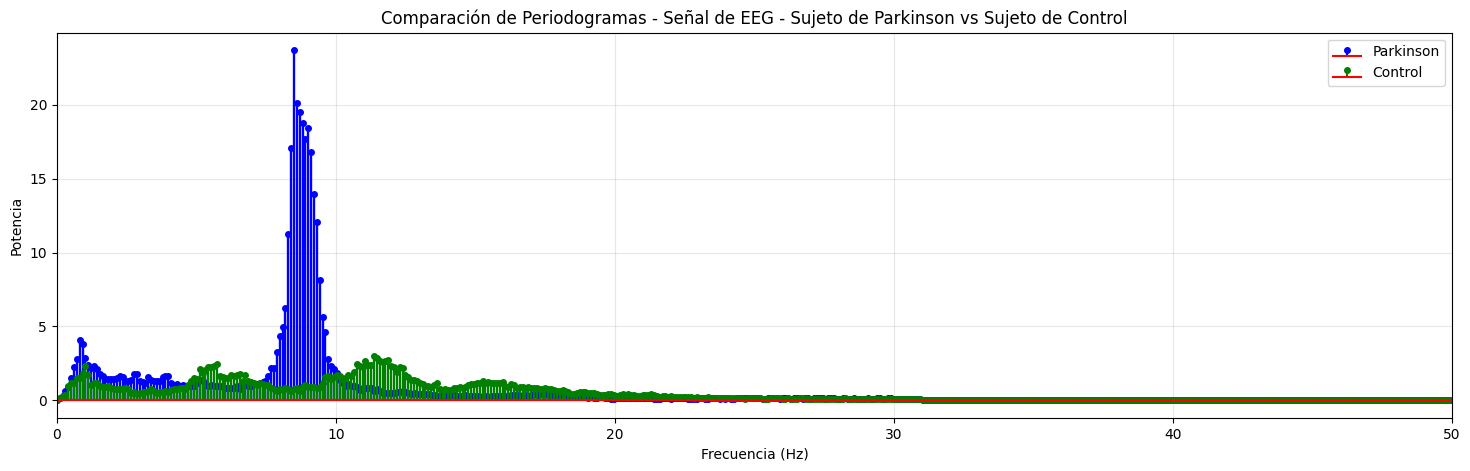

In [99]:
plt.figure(figsize=(18, 5))

# Parkinson
markerline1, stemlines1, baseline1 = plt.stem(f_Parkinson, Pxx_Parkinson, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.setp(markerline1, markersize=4, color='b')
plt.setp(stemlines1, linewidth=1.7, color='b')

# Control
markerline2, stemlines2, baseline2 = plt.stem(f_control, Pxx_control, linefmt='g-', markerfmt='go', basefmt='r-')
plt.setp(markerline2, markersize=4, color='g')
plt.setp(stemlines2, linewidth=1.7, color='g')

plt.title('Comparación de Periodogramas - Señal de EEG - Sujeto de Parkinson vs Sujeto de Control')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.xlim([0, 50])
plt.legend(['Parkinson', 'Control'], loc='upper right')
plt.grid(True, alpha=0.3)
plt.show()


La gráfica compara los periodogramas de señales EEG entre un sujeto con Parkinson (azul) y un sujeto control (verde), mostrando diferencias claras en la distribución espectral. El sujeto con Parkinson presenta un pico de potencia pronunciado alrededor de 9–10 Hz, correspondiente a la banda alfa, y una concentración de energía en frecuencias bajas (1–10 Hz), lo que refleja una actividad cerebral más lenta y sincronizada, típica de alteraciones motoras y rigidez. En contraste, el sujeto control muestra una distribución más uniforme y estable de la potencia, sin picos dominantes, con una presencia más notable en la banda beta (13–30 Hz), asociada al control motor y a la actividad cortical normal. En conjunto, la gráfica evidencia que el Parkinson se caracteriza por un desplazamiento de la actividad hacia frecuencias bajas y una reducción de las componentes de alta frecuencia, coherente con una menor diversidad y flexibilidad neuronal.

**Conclusiones**

*   El uso de periodogramas permite el análisis comparativos entre dos señales. Los periodogramas permiten una fácil visualización y comparación entre múltiples señales. En un solo gráfico, se puede comparar directamente la potencia en diferentes bandas de frecuencia para distintos sujetos, lo que facilita la identificación de diferencias neurológicas o patológicas. En este caso, el incremento en la potencia en frecuencias bajas para el paciente con Parkinson es un ejemplo claro de cómo los periodogramas pueden resaltar anomalías específicas.

*   La comparación de señales EEG mediante periodogramas puede contribuir al desarrollo de herramientas de diagnóstico asistidas o aprendizaje automático. Los patrones observados en las señales de sujetos con Parkinson pueden entrenar modelos predictivos que ayuden a automatizar la detección temprana de la enfermedad en base a la actividad cerebral.

*   En este el trabajo se compararón señales EEG de un solo sujeto con Parkinson y un sujeto de control. A pesar de que los resultados mostrarón diferencias esperada, el uso de un solo sujeto (tanto para control como para Parkinson) limita el análisis y las conclusiones a las que se pudieron llegar. Se debe aumentar la cantidad de sujetos que permita obtener resultados más significativos y con mayor validez.



**Referencias**

[1] Calcagno, J. (s.f.). Cálculo de Potencia Media en señales periódicas. Panel de Estado - Facultad de Ingeniería UNMdP. https://www3.fi.mdp.edu.ar/virtuallab/matavanzada/anexos_teoria-practica/2.pdf

[2] Alvarado Reyes, J., & Stern Forgach, C. (2010, diciembre). Un complemento al teorema de Nyquist. Scielo. https://www.scielo.org.mx/pdf/rmfe/v56n2/v56n2a2.pdf

[3] APLICANDO LA ‘TRANSFORMADA DE FOURIER’ EN PYTHON, CON ‘numpy’. (s.f.). El Programador Chapuzas. https://programacionpython80889555.wordpress.com/2023/12/06/aplicando-la-transformada-de-fourier-en-python-con-numpy/

[4] Torres-García, A. (2013, abril). Análisis de señales electroencefalográficas para la clasificación de habla imaginada. Scielo. https://www.scielo.org.mx/scielo.php?script=sci_arttext&amp;pid=S0188-95322013000100002#:~:text=Por%20ejemplo,%20las%20frecuencias%20del,,%20128,%20ó%20256).

[5]  L. Tereshchenko y M. E. Josephson, “Frequency Content and Characteristics of Ventricular Conduction”, J Electrocardiol, vol. 48, n.º 6, 2015. [En línea]. Disponible: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4624499/#:~:text=Modern%20ECG%20machines%20record%20ECG,Hz%20as%20an%20industry%20standard.

[6] Bendat, J. S., & Piersol, A. G. (2011). Random Data: Analysis and Measurement Procedures (4th ed.). Wiley-Interscience.
Este libro ofrece una cobertura amplia sobre técnicas de análisis de datos aleatorios, incluyendo métodos de estimación de espectros.

[7] Cohen, L. (1995). Time-Frequency Analysis. IEEE Signal Processing Magazine, 12(4), 28-39.

[8] Babiloni, C., Marzano, N., & Rossini, P. M. (2016). Cortical sources of alpha rhythms in patients with Parkinson’s disease. Clinical Neurophysiology, 127(1), 515-522.

[9] Brown, P., Oliviero, A., & Mazzone, P. (2001). Dopamine-dependent changes in oscillatory beta activity in the human motor cortex. Journal of Neuroscience, 21(2), 538-546.